# CASE STUDY: Breast Cancer Analysis and Prediction

### Problem Statement

* Predicting if the cancer diagnosis is benign or malignant based on several observations/features
* 30 features are used, example:

    * radius(mean of distances fram center to points on the parimeter)
    * texture (standard deviation of grey-scale values)
    * preimeter
    * area
    * smoothness (local variation in radis lengths)
    * compactness (perimeter^2 / area - 1.0)
    * concavity (severity of concave portions of the contour)
    * concave points (number of concave portions of the contour)
    * symmetry
    * fractal dimentions (*coastline approximation* - 1)
    
* Datasets are linearly separable using all 30 input features
* Number of instances: 569
* Class distribution: 212 Malignant, 357 Benign
* Target class:
    - Malignant
    - Benign
    
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Data Exploraion

In [2]:
# Load the data
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Count the number of rows and columns in the dataset
df.shape

(569, 33)

In [4]:
# Count the number of empty values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# Drop the column with all missing values
df = df.dropna(axis=1)

In [6]:
# Get the new count of the number of rows and columns
df.shape

(569, 32)

In [7]:
# Get a count of the number of Malignant (M) or Benign (B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

D:\data_science\Covid19\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


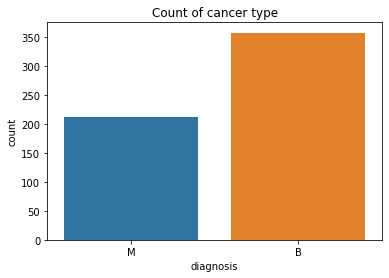

In [8]:
# Visulaize the count
plt.title('Count of cancer type')
sns.countplot(df['diagnosis'], label='count');

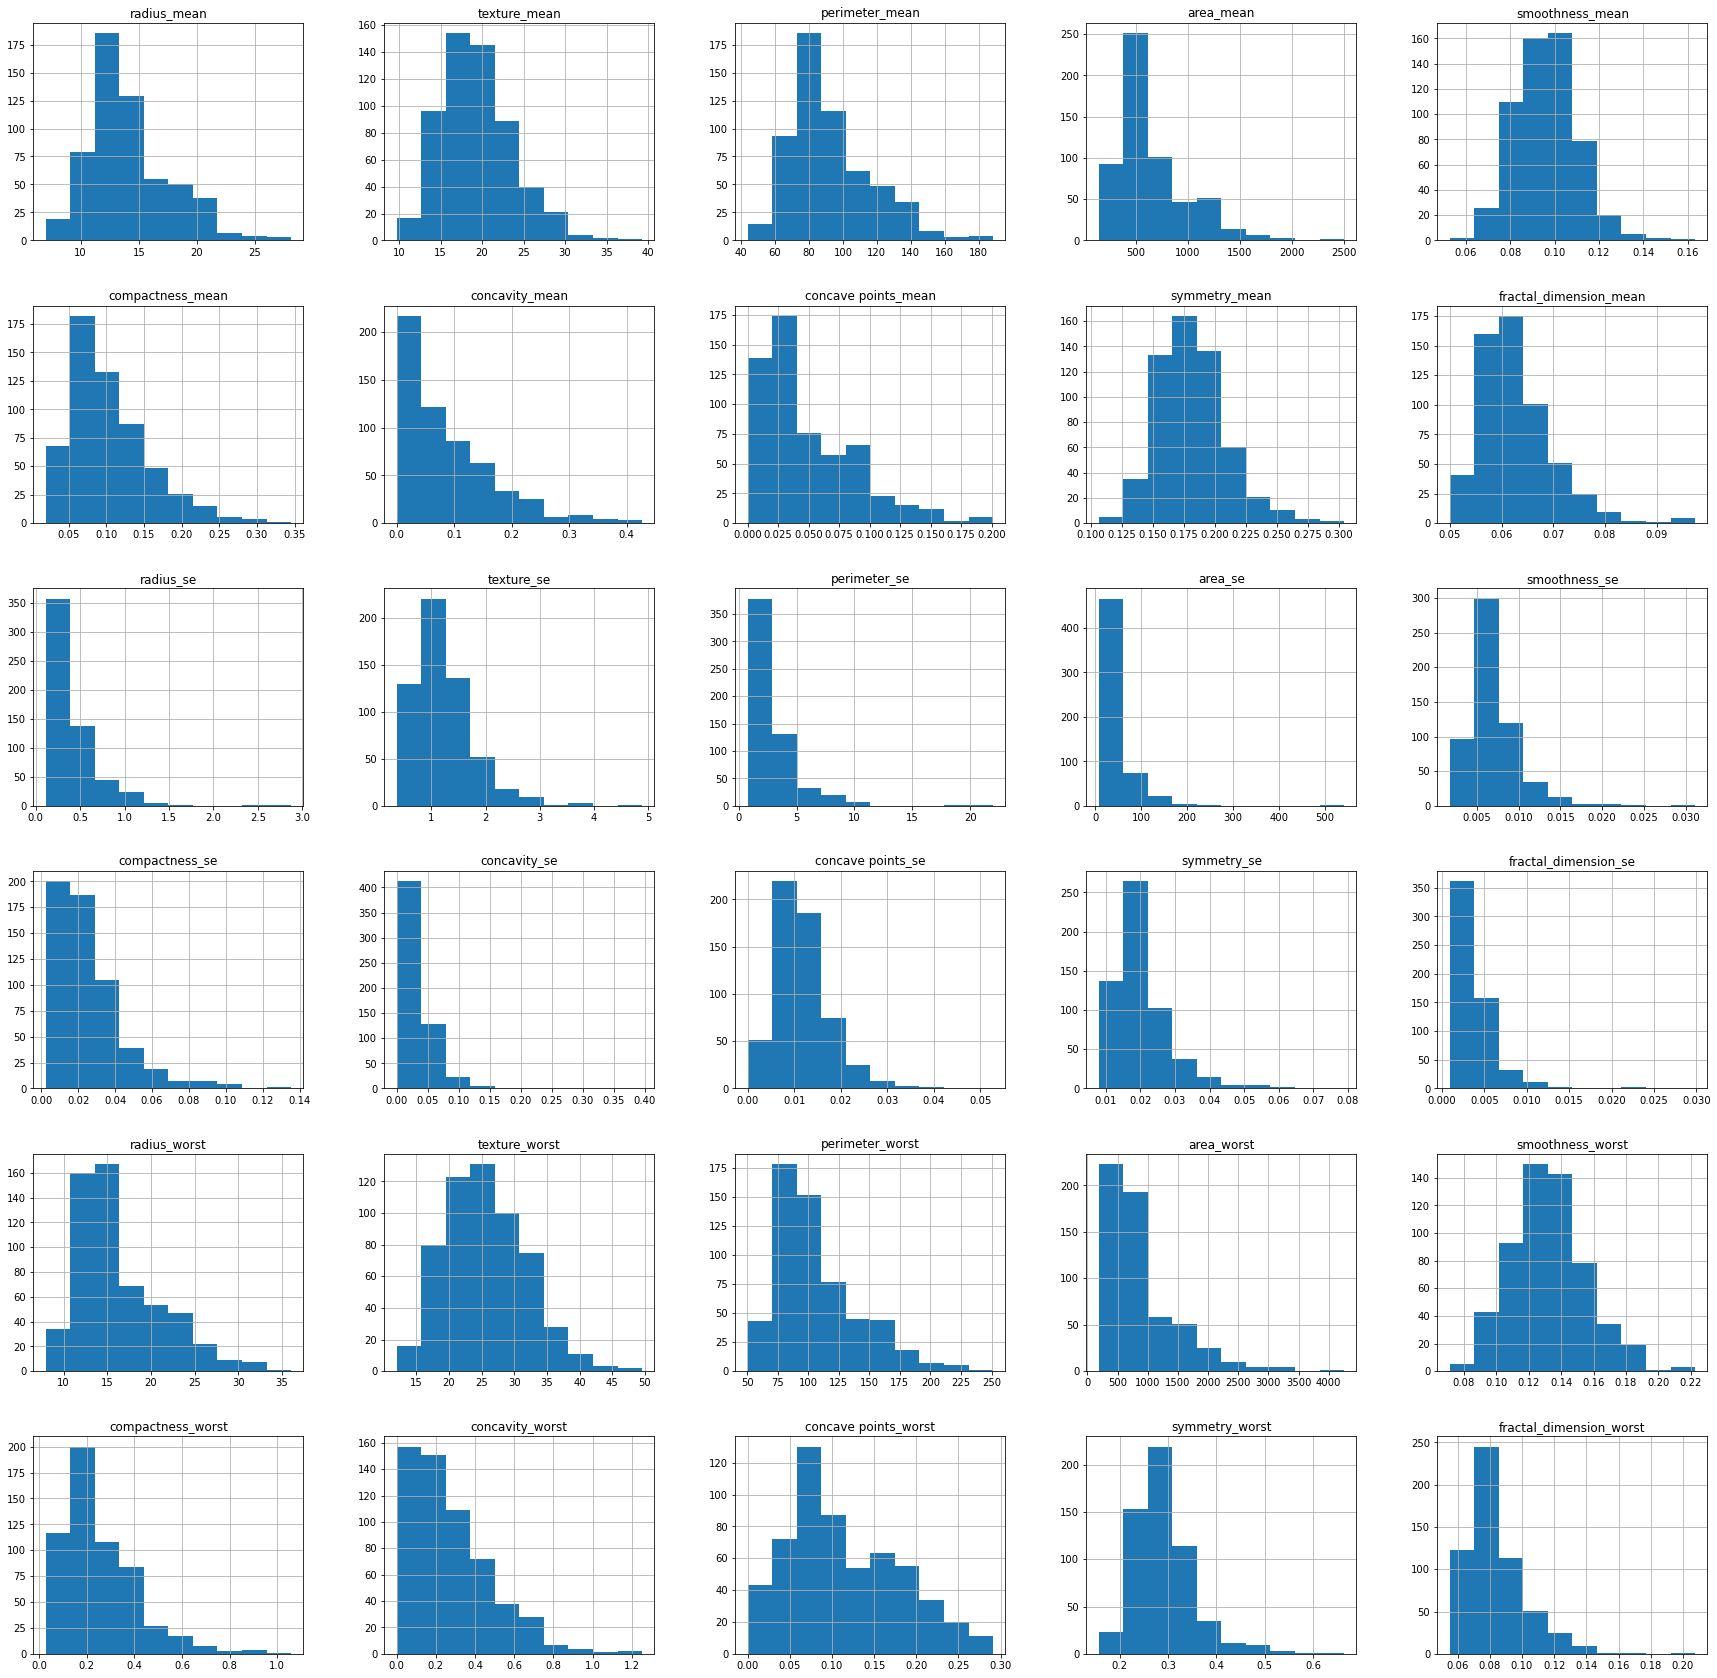

In [9]:
df.iloc[:,1:].hist(figsize = (30,30))
plt.show()

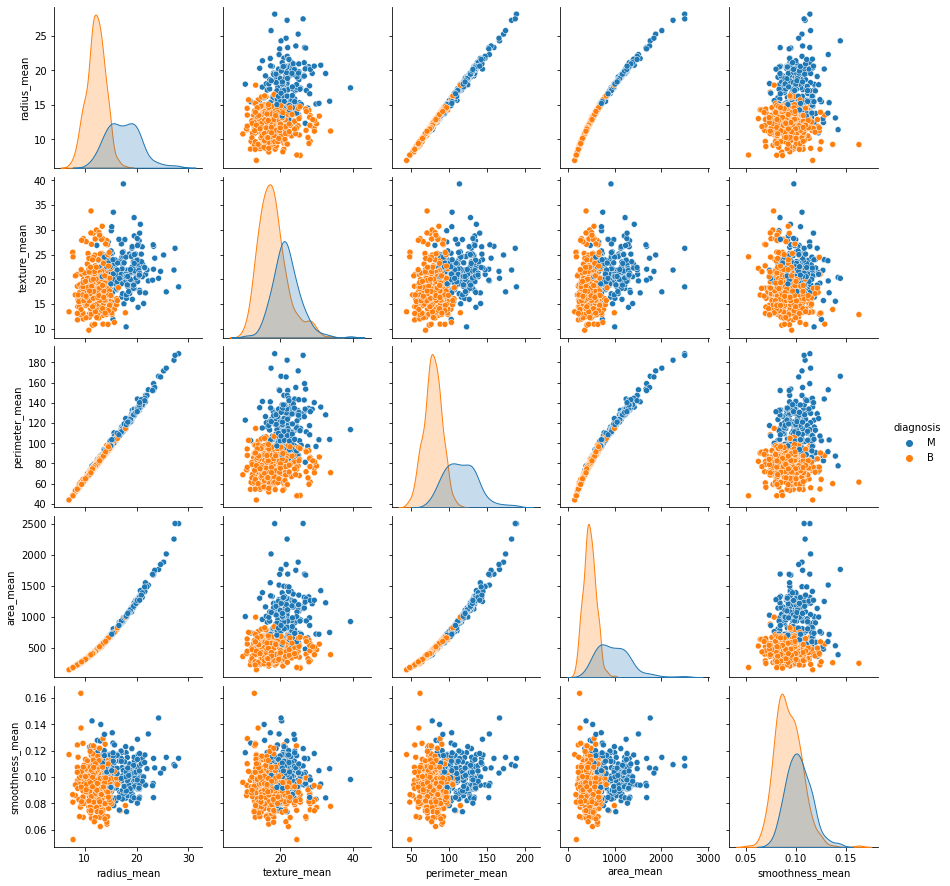

In [11]:
# Create a pair plot
sns.pairplot(df.iloc[:,1:7], hue='diagnosis');

In [12]:
# Get the correlations of the columns
df.iloc[:,1:12].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


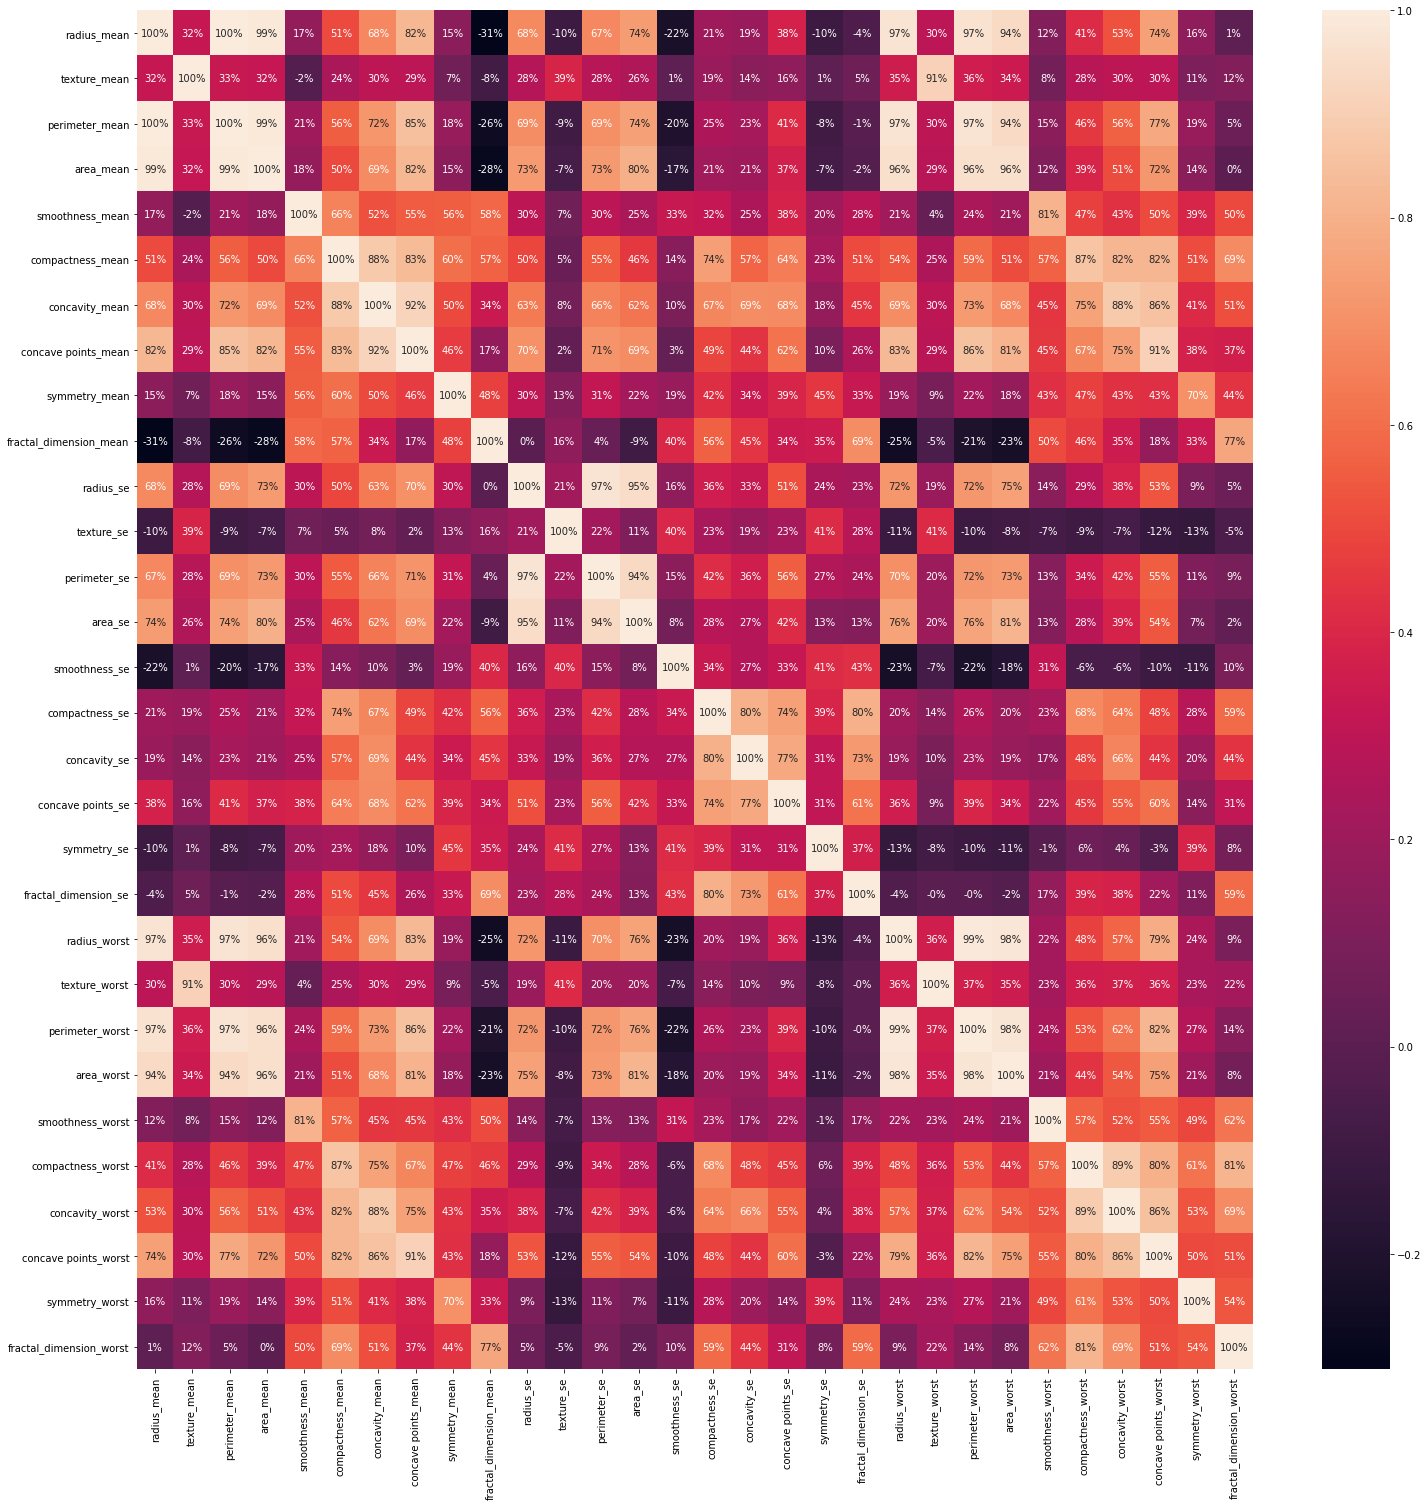

In [13]:
# Visualize the correlation
plt.figure(figsize=(25,25))
sns.heatmap(df.iloc[:,1:].corr(), annot=True, fmt='.0%');

In [14]:
# Look at the data types to see which colums need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [15]:
# Encode the categorical data values
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [16]:
# Print the first 5 rows of the new data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data modelling

In [17]:
# Split the dataset into independent (X) and dependent (Y) datasets
X = df.iloc[:,2:31].values
y = df.iloc[:,1].values

In [18]:
# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [19]:
# Scale the data (feature scaling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
# Create a function for the models
def models(X_train, y_train):
    
    # Logistic Regression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    # Decision Tree
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    
    # Random Forest Classifier
    forest = RandomForestClassifier(random_state=0)
    forest.fit(X_train, y_train)
    rf = RandomForestClassifier()
    
    #Print the models accuracy on the training data
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
    
    return log, tree, forest

In [21]:
model = models(X_train, y_train)

[0]Logistic Regression Training Accuracy: 0.9912087912087912
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 1.0


In [89]:
# Test model accuracy on test data on confusion matrix
for i in range(len(model)):
    print('Model ',i)
    print(confusion_matrix(y_test, model[i].predict(X_test)))
    print(classification_report(y_test, model[i].predict(X_test)))
    print(accuracy_score(y_test, model[i].predict(X_test)))
    print('________________________________________________________')
    print()

Model  0
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

0.9649122807017544
________________________________________________________

Model  1
[[63  4]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

0.9385964912280702
________________________________________________________

Model  2
[[65  2]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67

Clearly, the accuracy of Decision Tree Classifier is lowest and has a noticeable difference in the accuracy score with respect to other two models, i.e. Logistic Regression and Random Forest Classifier. The difference between the accuracy score of Logistic Regression and Random Forest Classifier is very low, hence tuning hyperparameters of both the models.

### Hyperparameter tuning on Logistic Regression model

In [23]:
# RandomizedSearchCV

penalty = ['l1', 'l2', 'elasticnet', 'none']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['lbfgs','newton-cg','liblinear','sag','saga']
max_iter = [int(x) for x in np.linspace(100,5000,10)]

# Create the random grid
log_random_grid = {'penalty': penalty,
                   'C': C,
                   'solver': solver,
                   'max_iter': max_iter}
print(log_random_grid)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 644, 1188, 1733, 2277, 2822, 3366, 3911, 4455, 5000]}


In [24]:
lr=LogisticRegression()
lr_randomcv=RandomizedSearchCV(estimator=lr,
                               param_distributions=log_random_grid,
                               n_iter=100, cv=3, verbose=4,
                               random_state=0, n_jobs=-1)
# fit the randomized model
lr_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


D:\data_science\Covid19\env\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.93405077        nan        nan 0.9450883
 0.95609678 0.96928372 0.96929825        nan 0.90989892 0.96269025
 0.63735913 0.96489776 0.96488323 0.94505925 0.96488323 0.93405077
 0.95609678 0.94728128 0.94950331        nan 0.96489776 0.6439526
        nan        nan        nan        nan 0.97366969        nan
        nan 0.95830429        nan 0.97807018        nan 0.94505925
 0.94947427 0.95830429        nan        nan 0.96928372        nan
 0.95609678 0.94505925 0.96266121 0.93405077 0.94505925        nan
        nan 0.9274573  0.94505925        nan        nan        nan
 0.94950331 0.93405077 0.94950331        nan 0.96049727        nan
 0.95830429 0.96928372        nan        nan 0.8725456         nan
 0.97147671 0.94726676 0.96928372        nan        nan 0.96269025
        nan        nan 0.96048275 0.94505925 0.94505

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'max_iter': [100, 644, 1188, 1733, 2277,
                                                     2822, 3366, 3911, 4455,
                                                     5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=0, verbose=4)

In [25]:
lr_randomcv.best_estimator_

LogisticRegression(C=0.1, max_iter=644, solver='liblinear')

In [26]:
best_log_random_grid = lr_randomcv.best_estimator_

In [27]:
lr_y_pred = best_log_random_grid.predict(X_test)
print(confusion_matrix(y_test, lr_y_pred))
print(accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

[[67  0]
 [ 4 43]]
0.9649122807017544
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        67
           1       1.00      0.91      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [28]:
# GridSearchCV

log_param_grid = {
    'penalty': [lr_randomcv.best_params_['penalty']],
    'C': [lr_randomcv.best_params_['C']/4,
          lr_randomcv.best_params_['C']/2,
          lr_randomcv.best_params_['C'], 
          lr_randomcv.best_params_['C']*2,
          lr_randomcv.best_params_['C']*4],
    'solver': [lr_randomcv.best_params_['solver']],
    'max_iter': [lr_randomcv.best_params_['max_iter']-200,
                 lr_randomcv.best_params_['max_iter']-100, 
                 lr_randomcv.best_params_['max_iter'], 
                 lr_randomcv.best_params_['max_iter']+100,
                 lr_randomcv.best_params_['max_iter']+200]
}

print(log_param_grid)

{'penalty': ['l2'], 'C': [0.025, 0.05, 0.1, 0.2, 0.4], 'solver': ['liblinear'], 'max_iter': [444, 544, 644, 744, 844]}


In [29]:
# Fit the grid_search to the data
lr = LogisticRegression()
lr_gridcv = GridSearchCV(estimator=lr,
                         param_grid=log_param_grid,
                         cv=10, n_jobs=-1, verbose=2)
lr_gridcv.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.025, 0.05, 0.1, 0.2, 0.4],
                         'max_iter': [444, 544, 644, 744, 844],
                         'penalty': ['l2'], 'solver': ['liblinear']},
             verbose=2)

In [30]:
lr_gridcv.best_estimator_

LogisticRegression(C=0.2, max_iter=444, solver='liblinear')

In [31]:
best_lr_gridcv = lr_gridcv.best_estimator_

In [32]:
lr_y_pred = best_lr_gridcv.predict(X_test)
print(confusion_matrix(y_test, lr_y_pred))
print(accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

[[67  0]
 [ 3 44]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Hyperparameter tuning on Random Forest Classifier model

In [33]:
# RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [1, 3, 4, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8, 10]

# Create the random grid
rfc_random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': ['entropy', 'gini']}
print(rfc_random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'criterion': ['entropy', 'gini']}


In [34]:
rf=RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf,
                               param_distributions=rfc_random_grid,
                               n_iter=100, cv=3, verbose=4,
                               random_state=0, n_jobs=-1)
# fit the randomized model
rf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


D:\data_science\Covid19\env\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.94288079 0.94067329        nan 0.94286627 0.94288079        nan
 0.93849483 0.94286627 0.94507378 0.94507378 0.9362728  0.94067329
 0.93848031 0.94288079 0.94067329 0.94726676 0.94286627        nan
        nan 0.94728128        nan 0.94288079 0.94726676 0.93848031
        nan 0.9450883  0.94728128 0.94067329 0.94726676 0.94728128
 0.94289532 0.94288079        nan        nan 0.94288079 0.94947427
        nan 0.94288079        nan        nan 0.93848031 0.94947427
 0.94286627 0.94948879 0.94286627 0.93405077 0.94507378 0.94286627
 0.9340653  0.94068781 0.93849483 0.94286627 0.94290984 0.94947427
 0.95166725 0.94947427 0.94726676        nan 0.94286627 0.94286627
 0.94286627 0.94067329 0.93846578 0.94728128 0.93846578        nan
 0.9340653  0.9450883  0.94728128 0.94286627 0.94947427 0.94288079
 0.93848031 0.9450883  0.94288079 0.94067329 0.940

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=4)

In [45]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=670, max_features='log2', min_samples_split=4,
                       n_estimators=1200)

In [37]:
best_rfc_random_grid = rf_randomcv.best_estimator_

In [38]:
rfc_y_pred = best_rfc_random_grid.predict(X_test)
print(confusion_matrix(y_test, rfc_y_pred))
print(accuracy_score(y_test, rfc_y_pred))
print(classification_report(y_test, rfc_y_pred))

[[65  2]
 [ 2 45]]
0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [49]:
# GridSearchCV

rfc_param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf']+4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split']-2,
                          rf_randomcv.best_params_['min_samples_split']-1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split']+1,
                          rf_randomcv.best_params_['min_samples_split']+2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators']-200,
                     rf_randomcv.best_params_['n_estimators']-100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators']+100,
                     rf_randomcv.best_params_['n_estimators']+200]
}

print(rfc_param_grid)

{'criterion': ['gini'], 'max_depth': [670], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 3, 4, 5, 6], 'n_estimators': [1000, 1100, 1200, 1300, 1400]}


In [50]:
# Fit the grid_search to the data
rf = RandomForestClassifier()
rf_gridcv = GridSearchCV(estimator=rf,
                         param_grid=rfc_param_grid,
                         cv=10, n_jobs=-1, verbose=2)
rf_gridcv.fit(X_train, y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [670],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [1000, 1100, 1200, 1300, 1400]},
             verbose=2)

In [51]:
rf_gridcv.best_estimator_

RandomForestClassifier(max_depth=670, max_features='log2', min_samples_split=4,
                       n_estimators=1000)

In [52]:
best_rf_grid = rf_gridcv.best_estimator_

In [53]:
rfc_y_pred = best_rf_grid.predict(X_test)
print(confusion_matrix(y_test, rfc_y_pred))
print(accuracy_score(y_test, rfc_y_pred))
print(classification_report(y_test, rfc_y_pred))

[[65  2]
 [ 2 45]]
0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [109]:
# Calculating the accuracy

acc_lr = round(accuracy_score(y_test, lr_y_pred)*100, 2)
print('Accuracy of Logistic Regression model : ', acc_lr, '%')

acc_rfc = round(accuracy_score(y_test, rfc_y_pred)*100, 2)
print('Accuracy of Random Forest Classifier model : ', acc_rfc, '%')

Accuracy of Logistic Regression model :  97.37 %
Accuracy of Random Forest Classifier model :  96.49 %


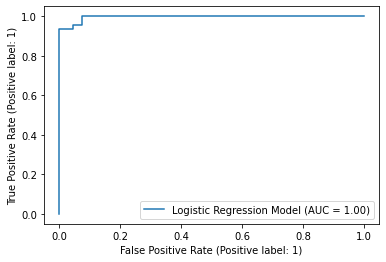

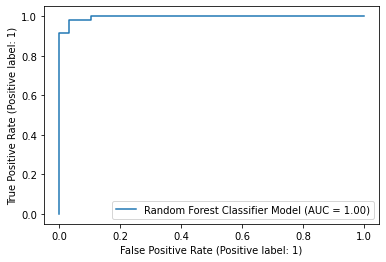

In [62]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(best_lr_gridcv, X_test, y_test, name='Logistic Regression Model');

plot_roc_curve(best_rf_grid, X_test, y_test, name='Random Forest Classifier Model');

In [79]:
from sklearn.model_selection import cross_val_score

def cross_validation(model, label):
    # Cross-validated accuracy
    cv_acc = cross_val_score(model,
                             X,
                             y,
                             cv=5,
                             scoring="accuracy")
    cv_acc = np.mean(cv_acc)

    # Cross-validated precision
    cv_precision = cross_val_score(model,
                             X,
                             y,
                             cv=5,
                             scoring="precision")
    cv_precision = np.mean(cv_precision)

    # Cross-validated recall
    cv_recall = cross_val_score(model,
                             X,
                             y,
                             cv=5,
                             scoring="recall")
    cv_recall = np.mean(cv_recall)

    # Cross-validated f1-score
    cv_f1 = cross_val_score(model,
                             X,
                             y,
                             cv=5,
                             scoring="f1")
    cv_f1 = np.mean(cv_f1)

    # Vizulaize our cross-validated matrics
    cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                               "Precision": cv_precision,
                               "Recall": cv_recall,
                               "F1": cv_f1},
                              index=[0])

    cv_metrics.T.plot.bar(title=label,
                          legend=False);
    
    print('Accuracy: ',cv_acc)
    print('Precision: ',cv_precision)
    print('Recall: ',cv_recall)
    print('F1-score: ',cv_f1)

Accuracy:  0.943766495885732
Precision:  0.9424647168549607
Recall:  0.9060908084163897
F1-score:  0.9226947277238619


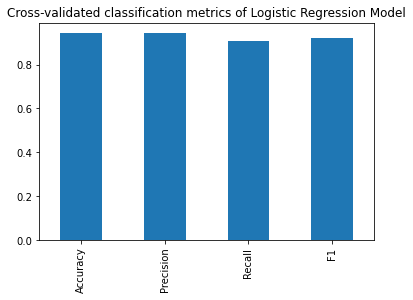

In [80]:
cross_validation(best_lr_gridcv, 'Cross-validated classification metrics of Logistic Regression Model')

Accuracy:  0.9596025461884802
Precision:  0.9622029133657041
Recall:  0.9344407530454042
F1-score:  0.9450617542659583


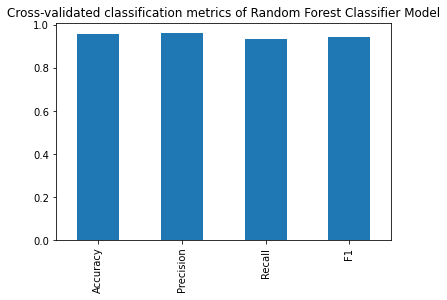

In [81]:
cross_validation(best_rf_grid, 'Cross-validated classification metrics of Random Forest Classifier Model')

### Feature importance of Logistic Regression model

In [84]:
# Check coef_ of Logistic Regression model
best_lr_gridcv.coef_

array([[ 0.35818529,  0.43397942,  0.3513885 ,  0.38308683,  0.18908338,
        -0.03540229,  0.43295713,  0.52200043,  0.21538774, -0.15509008,
         0.73347982,  0.00212058,  0.56320214,  0.54866852, -0.14205807,
        -0.32463193, -0.09953589,  0.06101685, -0.14163796, -0.334136  ,
         0.60464536,  0.64717463,  0.55491178,  0.57926582,  0.44657044,
         0.204635  ,  0.53003817,  0.63148995,  0.43177978]])

In [102]:
lr_feature_dict = dict(zip(df.iloc[:,2:].columns, list(best_lr_gridcv.coef_[0])))
lr_feature_dict

{'radius_mean': 0.35818528768419317,
 'texture_mean': 0.4339794204001122,
 'perimeter_mean': 0.35138849708934505,
 'area_mean': 0.38308682918142134,
 'smoothness_mean': 0.1890833840063251,
 'compactness_mean': -0.0354022876284814,
 'concavity_mean': 0.4329571302419541,
 'concave points_mean': 0.5220004338469278,
 'symmetry_mean': 0.21538774397116459,
 'fractal_dimension_mean': -0.155090076269066,
 'radius_se': 0.7334798205265048,
 'texture_se': 0.002120584368792527,
 'perimeter_se': 0.5632021433893031,
 'area_se': 0.5486685200557241,
 'smoothness_se': -0.14205806730943416,
 'compactness_se': -0.3246319282014166,
 'concavity_se': -0.09953589083053827,
 'concave points_se': 0.06101684760174336,
 'symmetry_se': -0.14163796461430078,
 'fractal_dimension_se': -0.33413599971253843,
 'radius_worst': 0.6046453593444366,
 'texture_worst': 0.6471746312820172,
 'perimeter_worst': 0.5549117765431717,
 'area_worst': 0.5792658170642084,
 'smoothness_worst': 0.44657043677634367,
 'compactness_worst':

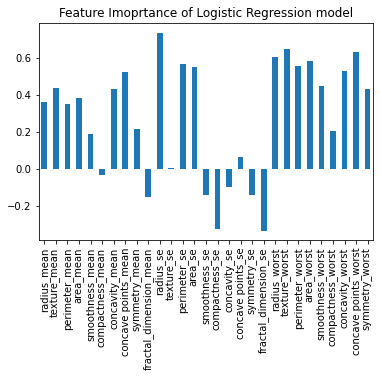

In [103]:
# Visualize feature importance
lr_feature_df = pd.DataFrame(lr_feature_dict, index=[0])
lr_feature_df.T.plot.bar(title="Feature Imoprtance of Logistic Regression model", legend=False);

### Feature importance of Random Forest Classifier model

In [105]:
# Check coef_ of Random Forest Classifier model
best_rf_grid.feature_importances_

array([0.04686556, 0.01526277, 0.03943582, 0.0493132 , 0.00727789,
       0.016964  , 0.0595196 , 0.09744083, 0.00451059, 0.00443854,
       0.02187891, 0.0047345 , 0.01427109, 0.05119973, 0.00412426,
       0.00567049, 0.00852774, 0.00652026, 0.0043208 , 0.0053909 ,
       0.10433334, 0.01789484, 0.11411944, 0.08339533, 0.01378633,
       0.02100616, 0.03845203, 0.12706099, 0.01228407])

In [107]:
rfc_feature_dict = dict(zip(df.iloc[:,2:].columns, list(best_rf_grid.feature_importances_)))
rfc_feature_dict

{'radius_mean': 0.0468655575508393,
 'texture_mean': 0.01526276901692306,
 'perimeter_mean': 0.03943582189930042,
 'area_mean': 0.04931319800376025,
 'smoothness_mean': 0.007277888012013827,
 'compactness_mean': 0.01696400138554425,
 'concavity_mean': 0.059519598091067834,
 'concave points_mean': 0.09744083482648808,
 'symmetry_mean': 0.004510587262804473,
 'fractal_dimension_mean': 0.004438536620040198,
 'radius_se': 0.021878912181544023,
 'texture_se': 0.004734496535671862,
 'perimeter_se': 0.014271085594803784,
 'area_se': 0.0511997256456145,
 'smoothness_se': 0.004124262827956014,
 'compactness_se': 0.005670489713521701,
 'concavity_se': 0.00852774142381334,
 'concave points_se': 0.0065202555246357185,
 'symmetry_se': 0.004320798729262004,
 'fractal_dimension_se': 0.0053909034796672806,
 'radius_worst': 0.1043333422350929,
 'texture_worst': 0.017894843275761033,
 'perimeter_worst': 0.11411943728457825,
 'area_worst': 0.08339533414475422,
 'smoothness_worst': 0.013786331859580685,
 

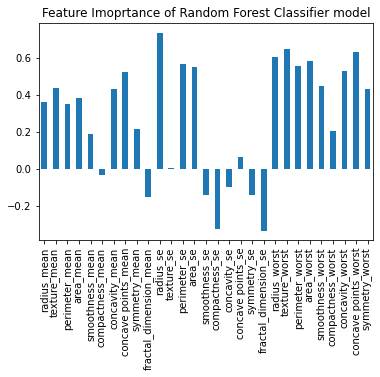

In [108]:
# Visualize feature importance
rfc_feature_dict = pd.DataFrame(lr_feature_dict, index=[0])
rfc_feature_dict.T.plot.bar(title="Feature Imoprtance of Random Forest Classifier model", legend=False);